# ISA Monte Carlo

I want to know whether a fixed term ISA of 1 year with a fixed interest rate of 4.31% (product A) is better than a flexible ISA with a variable rate of 4.2% and an introductory bonus of 1.51% (product B).

I'm going to try a Monte Carlo simulation to run multiple scenarios where the interest rate changes to see what the chances of product B being better are.

## Product A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Constants
principal = 20_000
bonus_rate = 0.0151 # 1.51% annual bonus, pro-rated for 3 months 
standard_rate_start = 0.042 # 4.2% base annual rate
bonus_period_months = 3
post_bonus_months = 12 - bonus_period_months

Now we need to make some assumptions about the post-bonus rate. We'll model the interest rate change as a normal distribution around 4.2%, meaning it might rise or fall randomly, with a standard deviation of 0.7%.

Because we're using a normal distribution, we expect about 68% of simulated rates will fall with 1 standard deviation of the mean (4.2% ± 0.7%) and about 95% of rates will fall within 2 standard deviations of the mean (4.2% ± 1.4%).

The 0.7% gives a sense of how uncertain we think the rate is. A larger standard deviation means we're allowing for more volatility in posible futures.

> Think of standard deviation (σ) as the wiggle room around your best guess. A low σ suggests you're confident rates will stay near 4.2%. A high σ means you're uncertain and the future could be better or worse.


In [2]:
# Monte Carlo parameters
n_simulations = 10000
rate_change_mu = 0 # expected change = 0 (stay at 4.2%)
rate_change_sigma = 0.007 # typical variation ± 0.7%

final_interests = []

# Simulate
for _ in range(n_simulations):
    # Step 1: Simulate random rate change
    # This draws a single random number from a normal distribution, centered at mu with a spread of sigma.
    # It's like rolling a loaded die where values near 0 are most common, but you sometimes get negative or positive outliers.
    rate_change = np.random.normal(rate_change_mu, rate_change_sigma)
    
    post_bonus_rate = standard_rate_start + rate_change

    # Clip to prevent negative interest rates
    post_bonus_rate = max(0, post_bonus_rate)

    # Step 2: Calculate interest
    bonus_period_interest = principal * (standard_rate_start + bonus_rate) * (bonus_period_months / 12)
    post_bonus_interest = principal * post_bonus_rate * (post_bonus_months / 12)
    total_interest = bonus_period_interest + post_bonus_interest
    final_interests.append(total_interest)

# Convert to numpy array
final_interests = np.array(final_interests)
print(final_interests)

    

[927.21550089 903.79015398 831.6668942  ... 889.36455772 841.25742496
 923.8606352 ]


Product A Expected interest: £916.21
Standard deviation: £105.34
Min: £504.75 | Max: £1300.38


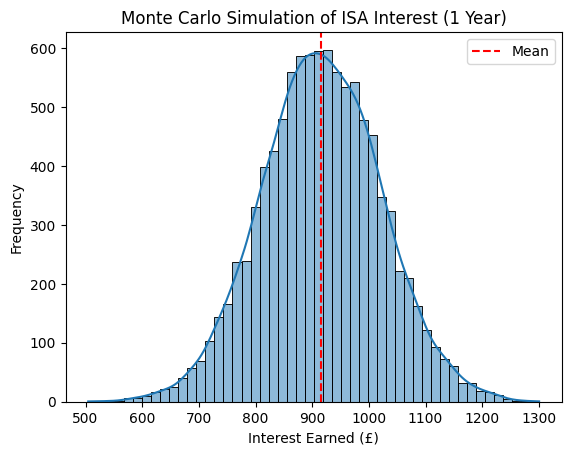

In [3]:
# Summary stats
mean_interest = np.mean(final_interests)
std_dev = np.std(final_interests)
min_interest = np.min(final_interests)
max_interest = np.max(final_interests)

print(f"Product A Expected interest: £{mean_interest:.2f}")
print(f"Standard deviation: £{std_dev:.2f}")
print(f"Min: £{min_interest:.2f} | Max: £{max_interest:.2f}")

# Plot histogram
sns.histplot(final_interests, bins=50, kde=True)
plt.axvline(mean_interest, color='red', linestyle='--', label='Mean')
plt.title('Monte Carlo Simulation of ISA Interest (1 Year)')
plt.xlabel('Interest Earned (£)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Product B

In [4]:
product_b_fixed_rate = 0.0431
total_interest_product_b = principal * product_b_fixed_rate
print(f"Product B Expected interest: £{total_interest_product_b:.2f}")


Product B Expected interest: £862.00
